In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

In [38]:
data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=20, start=[0.0,0.0], end=[4.0,4.0])
#data.add_function(lambda x: np.sin(6*x)+2, n=20, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

print(data)

Input dims: 2
Output dims: 1
X: [array([[2.86462004, 0.99950459],
       [2.43106694, 3.01035331],
       [0.98426676, 3.22776426],
       [1.53425482, 3.83194303],
       [3.12010816, 3.66408241],
       [1.82857881, 0.65094737],
       [0.07179675, 2.06107153],
       [1.87300159, 2.06952309],
       [1.71374293, 0.85810845],
       [0.24268667, 2.15366334],
       [0.42399778, 2.89990205],
       [2.68299192, 0.92545228],
       [0.55717336, 0.84741142],
       [2.21347848, 0.87269554],
       [2.55453534, 0.73764467],
       [3.02360809, 2.56718811],
       [0.53467253, 1.69248851],
       [2.66148711, 3.46164838],
       [2.69103527, 0.80748898],
       [1.72469457, 0.96458773]])]
Y: [array([-0.03652328,  1.60644402,  0.50061484, -0.32237669, -1.1285281 ,
       -1.72172077,  1.39765835,  0.01812931, -0.33377233,  1.93086636,
        0.68302515,  0.36468225,  0.16346565,  1.15540064,  0.08900127,
       -1.604142  , -0.81146597, -0.60047139, -0.29219687,  0.08200505])]


In [39]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

[{'mixture_weights': 0.16315920696045524,
  'mixture_means': array([0.7363029 , 0.01303036]),
  'mixture_scales': array([0.47306529, 0.04124192])},
 {'mixture_weights': 0.6858138354774668,
  'mixture_means': array([0.2392288 , 1.31411938]),
  'mixture_scales': array([0.38316302, 0.39722167])},
 {'mixture_weights': 0.4882410119767678,
  'mixture_means': array([0.36600468, 0.47851722]),
  'mixture_scales': array([0.5150719 , 0.21820767])}]

In [40]:
sm.init_params()
display(sm.get_params())

[{'mixture_weights': 0.2503743662563913,
  'mixture_means': array([0.87115554, 1.00673935]),
  'mixture_scales': array([0.47306529, 0.04124192])},
 {'mixture_weights': 0.44977296862545346,
  'mixture_means': array([0.49780317, 0.23687985]),
  'mixture_scales': array([0.38316302, 0.39722167])},
 {'mixture_weights': 0.46485667500700034,
  'mixture_means': array([1.3689587 , 1.01955415]),
  'mixture_scales': array([0.5150719 , 0.21820767])}]

In [41]:
sm.train()
display(sm.get_params())

Building...
Optimizing...


InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[node GPR-e7dbc4ae-141/likelihood_1/Cholesky (defined at /home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/models/gpr.py:64) ]]

Caused by op 'GPR-e7dbc4ae-141/likelihood_1/Cholesky', defined at:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-5a09bed84b2a>", line 1, in <module>
    sm.train()
  File "../mogptk/model.py", line 185, in train
    self.build(kind, disp)
  File "../mogptk/model.py", line 128, in build
    self.model = gpflow.models.GPR(x, y, self._kernel())
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 90, in __init__
    self.build()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/models/model.py", line 79, in _build
    likelihood = self._build_likelihood()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/decors.py", line 49, in name_scope_wrapper
    return method(*args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/models/gpr.py", line 64, in _build_likelihood
    L = tf.cholesky(K)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 767, in cholesky
    "Cholesky", input=input, name=name)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[node GPR-e7dbc4ae-141/likelihood_1/Cholesky (defined at /home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/models/gpr.py:64) ]]


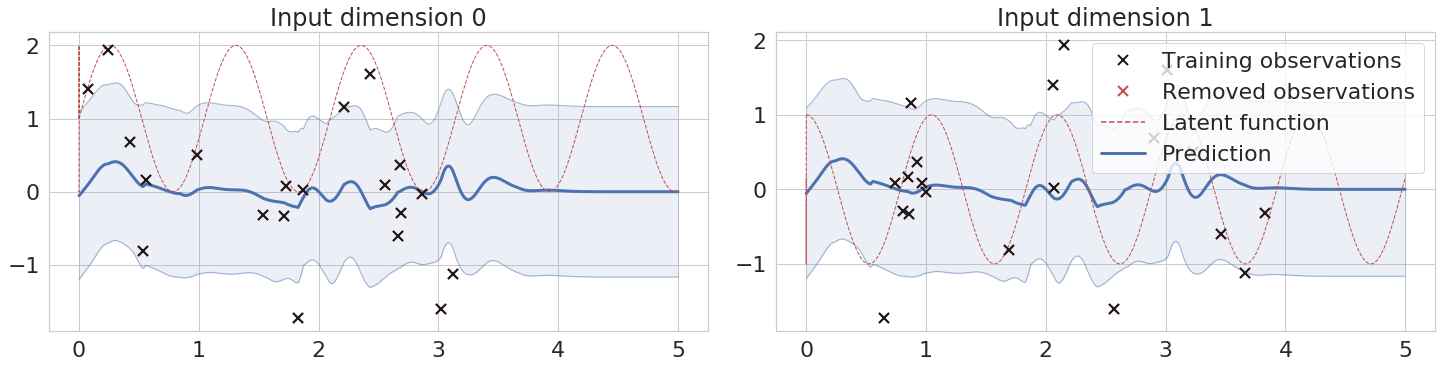

In [43]:
sm.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=2000)
sm.predict()
mogptk.plot(sm)

## MOSM

In [61]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

[{'magnitude': array([-0.13092112]), 'mean': array([[-2.11376939],
         [-0.4508132 ]]), 'variance': array([[0.02803231],
         [0.62777132]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.86169619])},
 {'magnitude': array([-0.84173469]), 'mean': array([[ 0.42407182],
         [-0.28992904]]), 'variance': array([[0.51827336],
         [0.55746452]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.22827577])},
 {'magnitude': array([-0.01168421]), 'mean': array([[1.41608801],
         [1.0497923 ]]), 'variance': array([[0.85289504],
         [0.44778854]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.45638017])}]

In [62]:
mosm.init_params()
display(mosm.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 22.795368
  Number of iterations: 39
  Number of functions evaluations: 47


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 20.859793
  Number of iterations: 76
  Number of functions evaluations: 92


[{'magnitude': array([0.33653044]), 'mean': array([[6.42031849e-06],
         [6.28878352e+00]]), 'variance': array([[5.66960147e-02],
         [1.00024123e-06]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.86169619])},
 {'magnitude': array([0.02253115]), 'mean': array([[ 5.58626036],
         [17.12187202]]), 'variance': array([[1.00000012e-06],
         [1.00000000e-06]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.22827577])},
 {'magnitude': array([5.06046195e-07]), 'mean': array([[3.24197712],
         [8.5122987 ]]), 'variance': array([[1.0031479e-06],
         [5.5347929e+00]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.45638017])}]

In [63]:
mosm.train()
display(mosm.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 15.706877
  Number of iterations: 95
  Number of functions evaluations: 119
Done


[{'magnitude': array([304.10538693]), 'mean': array([[-0.03783297],
         [ 6.43969849]]), 'variance': array([[1.34934805e-06],
         [1.00024447e-06]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([1.e-06])},
 {'magnitude': array([0.01806781]), 'mean': array([[ 5.58618377],
         [17.12157564]]), 'variance': array([[1.00000012e-06],
         [1.00000000e-06]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([1.e-06])},
 {'magnitude': array([-8.12001423]), 'mean': array([[2.97810672],
         [1.88387937]]), 'variance': array([[1.00316609e-06],
         [1.72303675e+00]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([1.e-06])}]

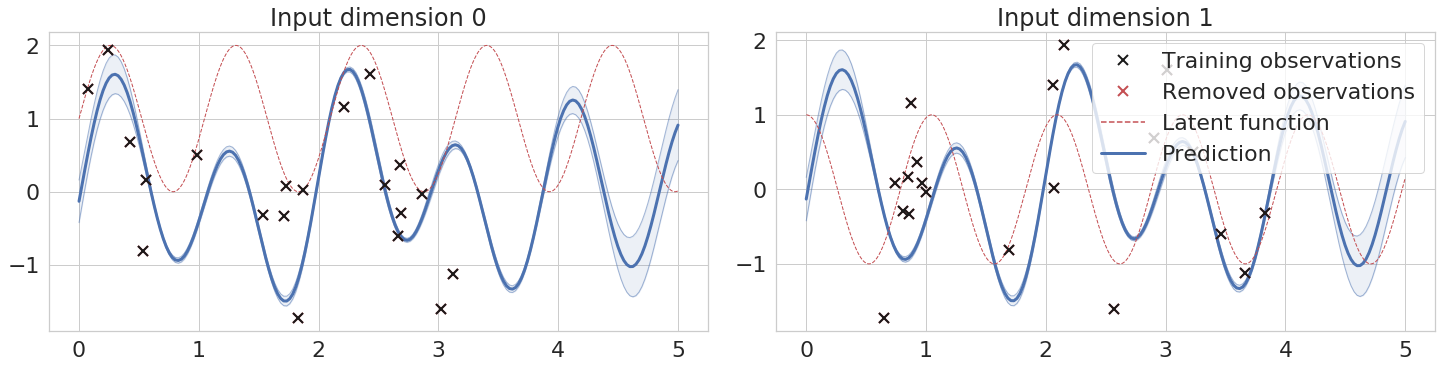

In [64]:
mosm.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=200)
mosm.predict()
mogptk.plot(mosm)

## SM-LMC

In [16]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

[{'constant': array([[-1.52559695]]),
  'mean': array([0.28556971, 0.2882797 ]),
  'variance': array([0.36686204, 0.63686913])},
 {'constant': array([[-0.15601637]]),
  'mean': array([0.9953309 , 0.52579018]),
  'variance': array([0.73634648, 0.95326953])},
 {'constant': array([[0.84227506]]),
  'mean': array([0.24950673, 0.52726189]),
  'variance': array([0.72694974, 0.69805825])}]

In [42]:
smlmc.init_params()
display(smlmc.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1.482470
  Number of iterations: 79
  Number of functions evaluations: 114


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -1.697426
  Number of iterations: 72
  Number of functions evaluations: 90
(2,)
(3, 2)
(2,)
(4, 2)
(2,)
(5, 2)
{'weight': array([0.        , 0.        , 0.        , 2.1135005 , 1.01090475,
       0.03334643]), 'mean': array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [2.10192748e+00, 5.93416835e+00],
       [1.99716167e+01, 1.99159786e+00],
       [6.28318761e-06, 6.28318531e-06]]), 'scale': array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.00000000e-06, 3.22861751e-04],
       [2.13484867e-06, 2.44671670e-02],
       [1.00007788e-06, 1.00000000e-06]])}
(6, 2)
(2,)


[{'constant': array([[-1.52559695]]),
  'mean': array([2.10192748, 5.93416835]),
  'variance': array([1.00000000e-06, 3.22861751e-04])},
 {'constant': array([[-0.15601637]]),
  'mean': array([19.97161672,  1.99159786]),
  'variance': array([2.13484867e-06, 2.44671670e-02])},
 {'constant': array([[0.84227506]]),
  'mean': array([6.28318761e-06, 6.28318531e-06]),
  'variance': array([1.00007788e-06, 1.00000000e-06])}]

In [43]:
smlmc.train()
display(smlmc.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 52.294374
  Number of iterations: 54
  Number of functions evaluations: 62
Done


[{'constant': array([[-0.27149733]]),
  'mean': array([1.83242636, 6.89940368]),
  'variance': array([1.00000000e-06, 1.04835229e-06])},
 {'constant': array([[-0.37823541]]),
  'mean': array([19.94157647,  1.78026006]),
  'variance': array([2.12338335e-06, 1.00000000e-06])},
 {'constant': array([[1.26619911]]),
  'mean': array([6.28305885e-06, 6.28318874e-06]),
  'variance': array([1.00007788e-06, 1.00000000e-06])}]

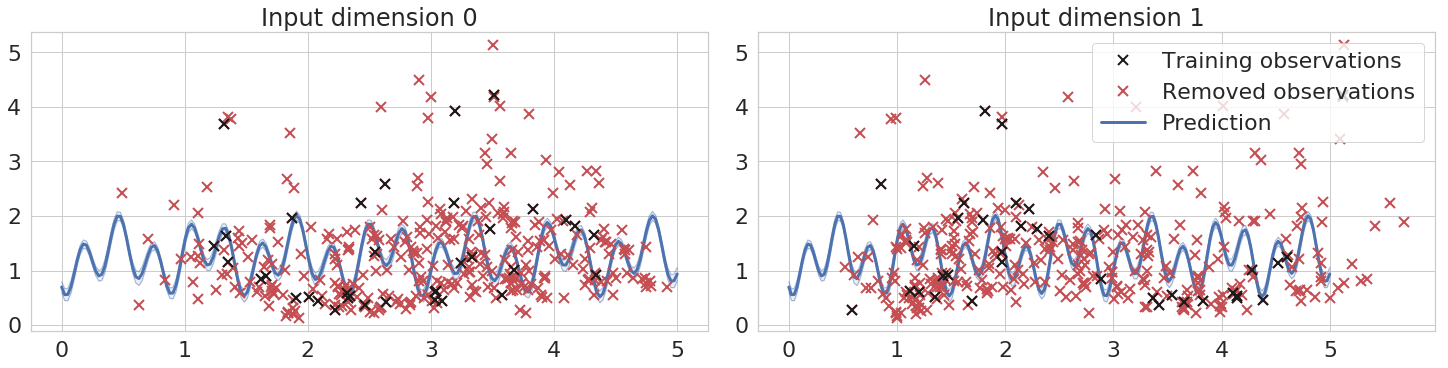

In [45]:
smlmc.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=200)
smlmc.predict()
mogptk.plot(smlmc)

## CSM

In [46]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

[{'constant': array([[0.09275475]]),
  'mean': array([0.51677278, 0.55033993]),
  'variance': array([0.66168428, 0.32594498]),
  'phase': array([[0.]])},
 {'constant': array([[0.94426177]]),
  'mean': array([0.10508273, 0.29890381]),
  'variance': array([0.10567283, 0.71559801]),
  'phase': array([[0.]])},
 {'constant': array([[0.57928846]]),
  'mean': array([0.06092752, 0.16412053]),
  'variance': array([0.97564044, 0.4272975 ]),
  'phase': array([[0.]])}]

In [48]:
csm.init_params()
display(csm.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 3.214240
  Number of iterations: 39
  Number of functions evaluations: 45


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -1.986042
  Number of iterations: 83
  Number of functions evaluations: 106


[{'constant': array([[0.09275475]]),
  'mean': array([6.28394734e-06, 1.90786686e-05]),
  'variance': array([1.00011084e-06, 1.16638405e-06]),
  'phase': array([[0.]])},
 {'constant': array([[0.94426177]]),
  'mean': array([0.01766748, 1.98275621]),
  'variance': array([0.00034097, 0.0285978 ]),
  'phase': array([[0.]])},
 {'constant': array([[0.57928846]]),
  'mean': array([2.29452273, 6.53035589]),
  'variance': array([1.01237915e-06, 9.20435117e-02]),
  'phase': array([[0.]])}]

In [49]:
csm.train()
display(csm.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 46.989488
  Number of iterations: 59
  Number of functions evaluations: 67
Done


[{'constant': array([[1.71095781]]),
  'mean': array([6.28393215e-06, 1.90766329e-05]),
  'variance': array([1.00011084e-06, 1.16186705e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.47456042]]),
  'mean': array([1.00000038e-06, 1.98573540e+00]),
  'variance': array([1.06665988e-06, 2.93982341e-02]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.06471306]]),
  'mean': array([0.53305425, 5.81703305]),
  'variance': array([1.01237858e-06, 1.00000000e-06]),
  'phase': array([[1.e-06]])}]

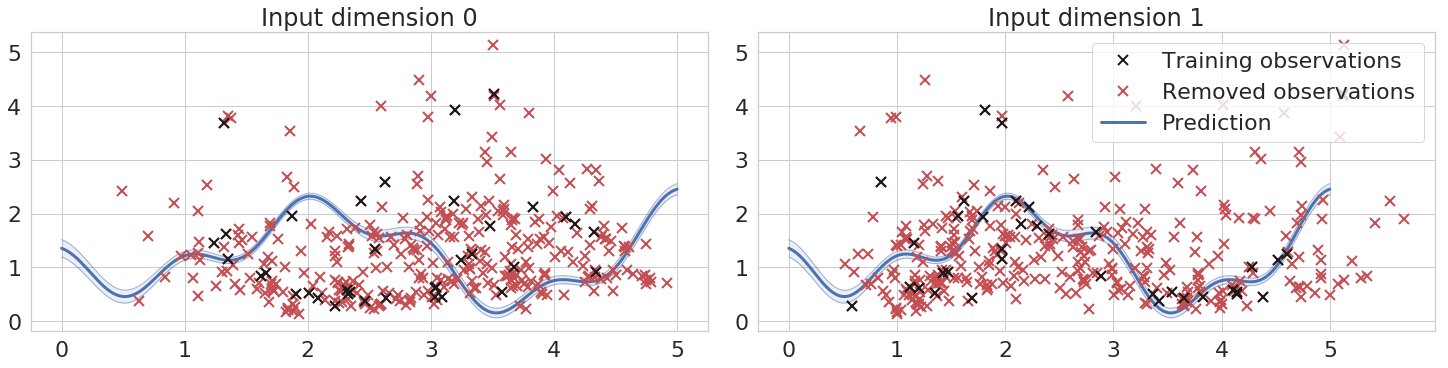

In [50]:
csm.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=200)
csm.predict()
mogptk.plot(csm)

## CG

In [22]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

[{'constant': array([0.85877386]), 'variance': array([[0.40859863],
         [0.87629701]])},
 {'constant': array([0.29031124]), 'variance': array([[0.88625928],
         [0.28578644]])},
 {'constant': array([0.22263937]), 'variance': array([[0.81929366],
         [0.57433492]])}]

In [24]:
cg.init_params()
display(cg.get_params())

[2.341 2.827 3.336 2.972 3.331 3.792 1.433 4.576 3.59  4.325 1.824 1.662
 1.587 2.774 2.731 1.857 1.354 1.932 3.046 2.04  2.537 2.584 4.412 4.331
 4.502 4.788 3.827 1.678 2.024 2.834 3.482 2.985 0.491 1.83  2.294 2.791] [0.62  0.4   1.28  3.805 1.255 1.535 1.605 1.38  2.08  0.56  0.165 0.905
 0.605 1.915 0.485 3.53  1.165 0.135 0.4   0.655 0.23  0.305 1.53  0.95
 0.86  0.72  2.12  1.188 1.805 1.425 1.765 1.675 2.415 2.685 0.67  1.52 ]


InvalidArgumentError: Input matrix is not invertible.
	 [[node GPR-ea869621-129/likelihood_1/MatrixTriangularSolve (defined at /home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/logdensities.py:100) ]]

Caused by op 'GPR-ea869621-129/likelihood_1/MatrixTriangularSolve', defined at:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-91b0712d03a7>", line 1, in <module>
    cg.init_params()
  File "../mogptk/models.py", line 471, in init_params
    params = estimate_from_sm(self.data, self.Q) # TODO: fix spectral mean
  File "../mogptk/models.py", line 94, in estimate_from_sm
    sm.train(method='BFGS', disp=False, maxiter=2000)
  File "../mogptk/model.py", line 185, in train
    self.build(kind, disp)
  File "../mogptk/model.py", line 128, in build
    self.model = gpflow.models.GPR(x, y, self._kernel())
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 90, in __init__
    self.build()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/models/model.py", line 79, in _build
    likelihood = self._build_likelihood()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/decors.py", line 49, in name_scope_wrapper
    return method(*args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/models/gpr.py", line 66, in _build_likelihood
    logpdf = multivariate_normal(self.Y, m, L)  # (R,) log-likelihoods for each independent dimension of Y
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/logdensities.py", line 100, in multivariate_normal
    alpha = tf.matrix_triangular_solve(L, d, lower=True)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 1741, in matrix_triangular_solve
    adjoint=adjoint, name=name)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Input matrix is not invertible.
	 [[node GPR-ea869621-129/likelihood_1/MatrixTriangularSolve (defined at /home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/logdensities.py:100) ]]


In [53]:
cg.train()
display(cg.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 53.544909
  Number of iterations: 21
  Number of functions evaluations: 26
Done


[{'constant': array([0.35817501]), 'variance': array([[2.92961335e+00],
         [1.44054757e-06]])},
 {'constant': array([1.38134283]), 'variance': array([[1.e-06],
         [1.e-06]])},
 {'constant': array([1.00110009e-06]), 'variance': array([[6.18888923e+01],
         [1.09242641e-06]])}]

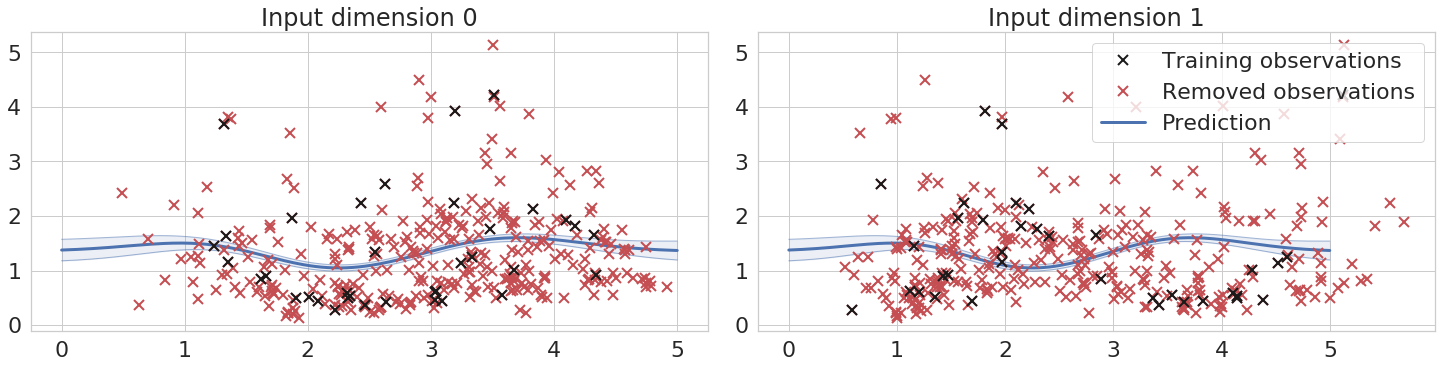

In [54]:
cg.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=200)
cg.predict()
mogptk.plot(cg)